In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

#Logistic Regression
class Logistic_Regression() :
    def __init__(self,X, lr, epochs):
        self.lr = lr        
        self.epochs = epochs
        self.samples, self.features = X.shape              
        self.weights = np.zeros(self.features)        
        self.bias = 0   

    #Sigmoid function
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    #Hypothesis function
    def hypothesis(self, X):
        return self.sigmoid(X.dot(self.weights) + self.bias) 
    
    #Gradient descent function
    def gradientDescent(self, hyp):
        # calculate gradients        
        dw = 1 / self.samples * np.dot(self.X.T,hyp-self.Y.T)
        db = 1 / self.samples * np.sum(hyp-self.Y.T) 
          
        #Update weight values  
        self.weights -= self.lr*dw
        self.bias -= self.lr*db
          
        return self
    
    #Training function
    def train(self, X, Y):     
        self.X = X        
        self.Y = Y
        cost_list = [] 
        for i in range( self.epochs + 1 ) : 
            #Hypothesis
            hyp = self.hypothesis(self.X)
            
            #Cost function - Cross entropy
            cost = -1 / self.samples * np.sum(self.Y * np.log(hyp) + (1-self.Y) * np.log(1 - hyp))    

            #Gradient descent
            self.gradientDescent(hyp) 

            cost_list.append(cost)

        return cost_list
    
    def predict(self, X):
        hyp = self.hypothesis(X)        
        predict = np.where(hyp > 0.5, 1, 0)        
        return predict



Get Dataset

In [2]:

path = 'D:\Repos\Intelligent-Systems-Technologies\heart.csv';
df = pd.read_csv(path)
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

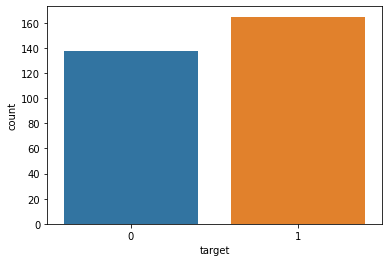

In [3]:
print(df.isnull().sum())
sns.countplot(x='target', data=df)

Check correlations

<function matplotlib.pyplot.show(close=None, block=None)>

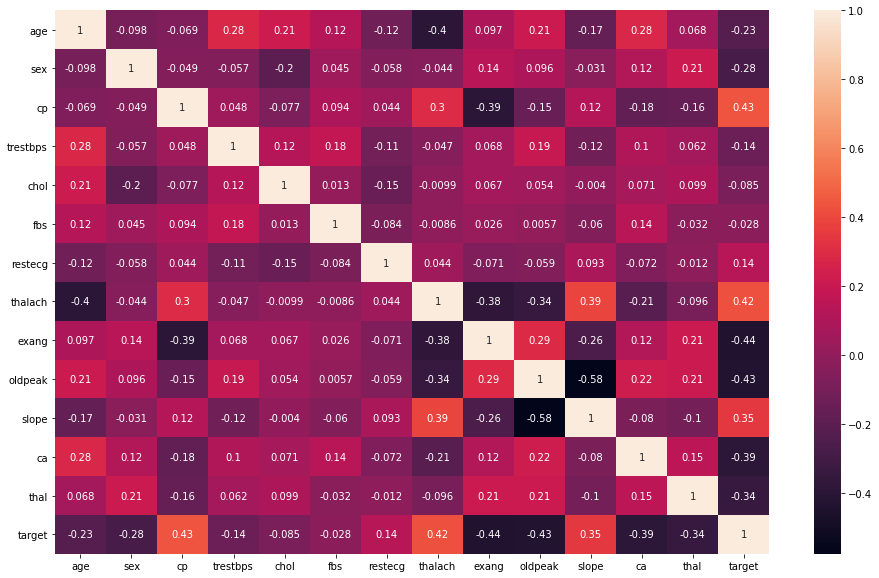

In [4]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show

Define features
Split data, into 80% training and 20% testing


In [8]:
path = 'D:\Repos\Intelligent-Systems-Technologies\heart.csv';
df = pd.read_csv(path)
x = df[['sex','cp','exang','oldpeak','slope','ca','thal']]
y = df.target.values

X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.20, random_state=5)

Training

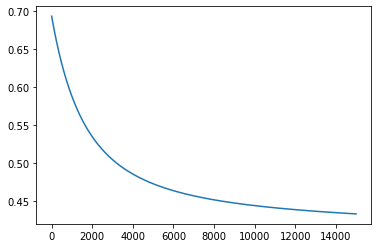

In [61]:
lr=0.001
epochs = 15000
model = Logistic_Regression( X_train, lr,epochs)
cost = model.train(X_train,Y_train)

plt.plot(np.arange(epochs + 1), cost)
plt.show()


Testing

In [63]:
Y_pred = model.predict( X_test ) 
    
accuracy = 0    
for i in range( np.size( Y_pred ) ) :  
    if Y_test[i] == Y_pred[i] :            
        accuracy += 1
print(f'Accuracy :  { accuracy / len(Y_pred) * 100} ')

Accuracy :  90.1639344262295 


Query

In [75]:
sex = input('Type 0 for female or 1 for male : ')
cp = input('The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) : ')
exang = input('Exercise induced angina (1 = yes, 0 no) :')
oldpeak = input('ST depression induced by exercise relative to rest (Value between 0 - 6.2) : ')
slope = input(' Enter the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) : ')
ca = input('Enter the numer of major vessels (0-3) : ')
thal = input('Thalium stress test result (3 = normal; 6 = fixed defect; 7 = reversable defect) : ')


In [73]:
# 1
sex = 0
cp = 2
exang = 0
oldpeak = 1.6
slope = 1
ca = 0
thal = 2

In [67]:
# 0
sex = 1
cp = 0
exang = 0
oldpeak = 1.2
slope = 1
ca = 2
thal = 3

In [74]:
q = pd.DataFrame(np.array([[ int(sex),int(cp),int(exang),float(oldpeak),int(slope),int(ca),int(thal)]]),columns=['sex','cp','exang','oldpeak','slope','ca','thal'])
print(q)
heart = model.predict(q)
if heart[0] == 1:
    print('High risk of heart disease')
else:
    print('Low risk of heart disease')


   sex   cp  exang  oldpeak  slope   ca  thal
0  0.0  2.0    0.0      1.6    1.0  0.0   2.0
hola
